## Loading  & Check the Shape of the data



In [1]:
#import numpy as np
import pandas as pd

# read the data and display the first 5 rows
train_df = pd.read_csv('./sample_data/bodyfat-comp.csv')
test_df = pd.read_csv('./sample_data/bodyfat-validate.csv')

print("\nNumber of samples:",train_df.shape[0],"and number of features:",train_df.shape[1],"\n")
print("\nNumber of samples:",test_df.shape[0],"and number of features:",test_df.shape[1],"\n")


Number of samples: 168 and number of features: 16 


Number of samples: 84 and number of features: 14 



In [2]:
import os
!pwd

/content


##  Now let's look through the data and do some basic data cleaning


In [3]:
print(train_df.head())
print(test_df.head())

        Id  Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen  \
0  Person2   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   
1  Person3   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   
2  Person4   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4   
3  Person6   1.0502     20.9   24  210.25   74.75  39.0  104.5     94.4   
4  Person7   1.0549     19.2   26  181.00   69.75  36.4  105.1     90.7   

     Hip  Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0   98.7   58.7  37.3   23.4    30.5     28.9   18.2  
1   99.2   59.6  38.9   24.0    28.8     25.2   16.6  
2  101.2   60.1  37.3   22.8    32.4     29.4   18.2  
3  107.8   66.0  42.0   25.6    35.7     30.6   18.8  
4  100.3   58.4  38.3   22.9    31.9     27.8   17.7  
          Id  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   Person68   55  154.75   71.50  36.9   95.4     86.6   91.8   54.3  35.4   
1  Person252   74  207.50   70.00  40.8  112.4    108.5  107.

In [4]:
# GETTING THE DATA TYPES+
train_df.dtypes

Id          object
Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

In [5]:
test_df.dtypes

Id          object
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

## Understanding basic statistics of the data set

In [6]:
print(train_df.describe())
print(test_df.describe())

          Density     BodyFat         Age      Weight      Height        Neck  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean     1.055817   18.994048   44.720238  177.323214   70.053571   37.961310   
std      0.018204    8.098242   12.691610   25.441979    4.061756    2.192801   
min      0.995000    3.000000   22.000000  127.500000   29.500000   31.100000   
25%      1.041550   12.175000   35.000000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  174.125000   70.000000   37.900000   
75%      1.071000   25.225000   54.000000  195.250000   72.250000   39.325000   
max      1.092600   47.500000   72.000000  244.250000   77.500000   43.900000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  168.000000  168.000000  168.000000  168.000000  168.000000  168.000000   
mean   100.194643   91.944048   99.618452   59.279167   38.470833   23.057143   
std      7.666736    9.7475

In [7]:
# Lets look into the null values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Id         0
Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64
Id         0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [8]:
#### EDA

<ipython-input-9-75e669c4c760>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


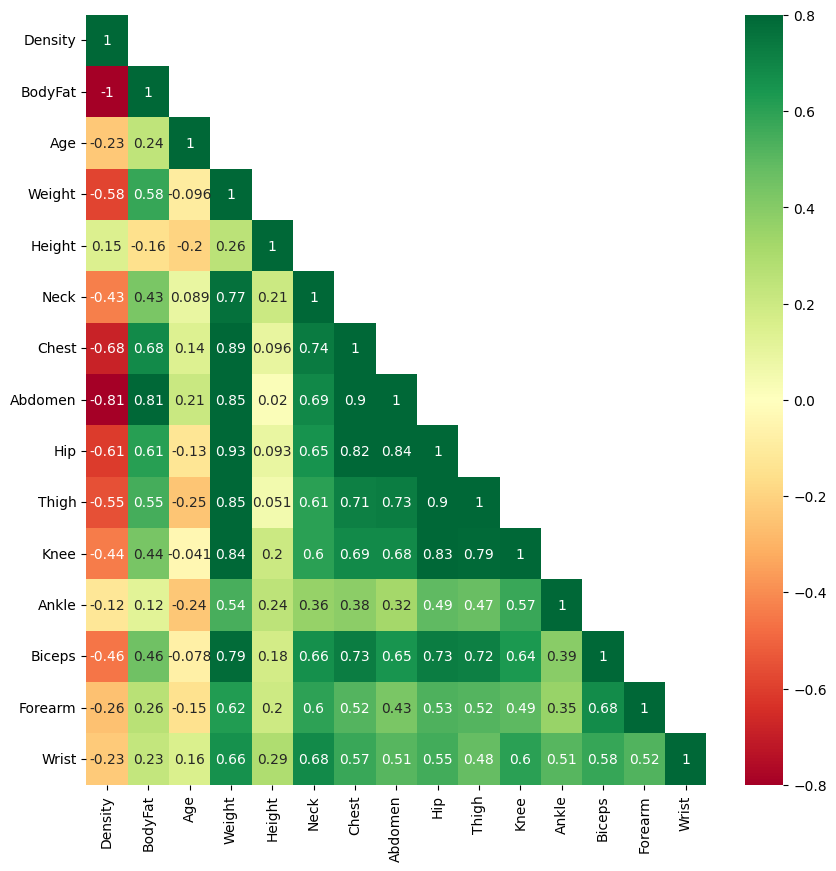

In [9]:
# Heatmap relative to all numeric columns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

corr_matrix = train_df.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

In [10]:
#Modelling
print(train_df.columns)
print(test_df.columns)

Index(['Id', 'Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')
Index(['Id', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')


In [11]:
print(train_df.head)
print(test_df.head)

<bound method NDFrame.head of             Id  Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen  \
0      Person2   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   
1      Person3   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   
2      Person4   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4   
3      Person6   1.0502     20.9   24  210.25   74.75  39.0  104.5     94.4   
4      Person7   1.0549     19.2   26  181.00   69.75  36.4  105.1     90.7   
..         ...      ...      ...  ...     ...     ...   ...    ...      ...   
163  Person244   1.0256     32.6   67  227.75   72.75  41.3  115.8    113.4   
164  Person246   1.0641     15.2   68  155.50   69.25  36.3   97.4     84.3   
165  Person247   1.0308     30.2   69  215.50   70.50  40.8  113.7    107.6   
166  Person248   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   
167  Person250   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5   

       Hip  Thigh  Kn

In [12]:
drop_columns_1 = ['Density','Id','Age']
train_df = train_df.drop(drop_columns_1,axis =1)



In [13]:
#model selection
from sklearn.model_selection import train_test_split,cross_validate
x_train,x_test,y_train,y_test=train_test_split(train_df.drop('BodyFat',axis=1),train_df['BodyFat'],test_size=0.20,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
#X_train_sc = sc.fit_transform(x_train)
#X_test_sc = sc.transform(x_test)

In [15]:
#regression
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost.sklearn import XGBRegressor

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

models=[DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),RidgeCV(),RandomForestRegressor(),KNeighborsRegressor(n_neighbors = 5),BaggingRegressor(),GradientBoostingRegressor(),LinearSVR(),XGBRegressor(),AdaBoostRegressor()]
model_names=['DecisionTreeRegressor','LinearRegression','Ridge','Lasso','RidgeCV','RandomForestRegressor','KNeighborsRegressor','BaggingRegressor','GradientBoostingRegressor','LinearSVR','XGBRegressor','AdaBoostRegressor']
rmse=[]
acc_sc=[]
d={}

for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    #rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSE':rmse }   
d


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Modelling Algo': ['DecisionTreeRegressor',
  'LinearRegression',
  'Ridge',
  'Lasso',
  'RidgeCV',
  'RandomForestRegressor',
  'KNeighborsRegressor',
  'BaggingRegressor',
  'GradientBoostingRegressor',
  'LinearSVR',
  'XGBRegressor',
  'AdaBoostRegressor'],
 'RMSE': [6.328483695353331,
  4.541571867636001,
  4.543216196325689,
  4.599349082211433,
  4.552232970089232,
  4.0413230142964744,
  4.541919780678391,
  4.39923623050237,
  3.648216832584208,
  5.94386324049419,
  4.014802584371021,
  4.556060917298643]}

In [16]:
test_df

,Id,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,Person68,55,154.75,71.50,36.9,95.4,86.6,91.8,54.3,35.4,21.5,32.8,27.4,18.7
1,Person252,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9
2,Person232,57,182.25,71.75,39.4,103.4,96.7,100.7,59.3,38.6,22.8,31.8,29.1,19.0
3,Person162,33,196.00,73.00,38.5,103.8,95.6,105.1,61.4,40.6,25.0,31.3,29.2,19.1
4,Person92,44,179.75,69.50,39.2,101.9,93.2,100.6,58.9,39.7,23.1,31.4,28.4,18.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Person208,47,195.00,72.50,40.2,102.7,101.3,101.7,60.7,39.4,23.3,36.7,31.6,18.4
80,Person91,46,177.00,70.00,37.2,99.7,95.6,102.2,58.3,38.2,22.5,29.1,27.7,17.7
81,Person15,35,187.75,69.50,40.5,101.3,96.4,100.1,69.0,39.0,23.1,36.1,30.5,18.2
82,Person160,31,177.25,71.50,36.2,101.1,92.4,99.3,59.4,39.0,24.6,30.1,28.2,18.2


In [17]:
#ased on above computation Linear Regression has the least RMSE which is less than 5 so using the test data we have predicted.
clf=LinearRegression()
clf.fit(x_train,y_train)
drop_columns_2 = ['Id','Age']
test_df_2 = test_df.drop(drop_columns_2,axis =1)

test_pred=clf.predict(test_df_2)

d={'Id':test_df['Id'],'BodyFat':test_pred}
ans=pd.DataFrame(d)
ans

,Id,BodyFat
0,Person68,15.992917
1,Person252,27.946710
2,Person232,21.706737
3,Person162,19.022135
4,Person92,18.683841
...,...,...
79,Person208,26.047555
80,Person91,21.721898
81,Person15,25.274042
82,Person160,20.124813


In [18]:
ans.to_csv('./sample_data/submission.csv',index=False) # saving to a csv file for predictions on kaggle.